Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install idx2numpy
import idx2numpy

from sklearn.naive_bayes import GaussianNB

!pip install tqdm
from tqdm import *

import plotly.express as px
import plotly
import plotly.graph_objects as go

Importing the dataset from drive 

(Google Drive is mounted and the dataset is unzipped in that location)



In [2]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [3]:
trainData="/content/drive/MyDrive/ML Data/train-images.idx3-ubyte"
trainLabels="/content/drive/MyDrive/ML Data/train-labels.idx1-ubyte"

testData="/content/drive/MyDrive/ML Data/t10k-images.idx3-ubyte"
testLabels="/content/drive/MyDrive/ML Data/t10k-labels.idx1-ubyte"

In [4]:
testImageData = idx2numpy.convert_from_file(testData)
trainImageData = idx2numpy.convert_from_file(trainData)
testLabelData = idx2numpy.convert_from_file(testLabels)
trainLabelData = idx2numpy.convert_from_file(trainLabels)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print(testImageData[:3,:])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


# 0 1 Classification


Appending only 0 and 1 labels to our data and removing redundant dataset

In [7]:
trainRedundantSet=[]
testRedundantSet=[]

In [8]:
for index, label in enumerate(tqdm(trainLabelData)):
    if label>=2:
        trainRedundantSet.append(index)

for index, label in enumerate(tqdm(testLabelData)):
    if label >= 2:
        testRedundantSet.append(index)

100%|██████████| 10000/10000 [00:00<00:00, 299800.86it/s]


Deleting the redundant data from the original array

In [9]:
trainData = np.delete(trainImageData, trainRedundantSet, axis=0)
trainLabels = np.delete(trainLabelData, trainRedundantSet, axis=0)

testData = np.delete(testImageData, testRedundantSet, axis=0)
testLabels = np.delete(testLabelData, testRedundantSet, axis=0)

Reshaping the data

In [10]:
print("Train Data:")
print(np.shape(trainData))
print(np.shape(trainLabels))
print()
print("Test Data:")
print(np.shape(testData))
print(np.shape(testLabels))

Train Data:
(12665, 28, 28)
(12665,)

Test Data:
(2115, 28, 28)
(2115,)


Some sample data....

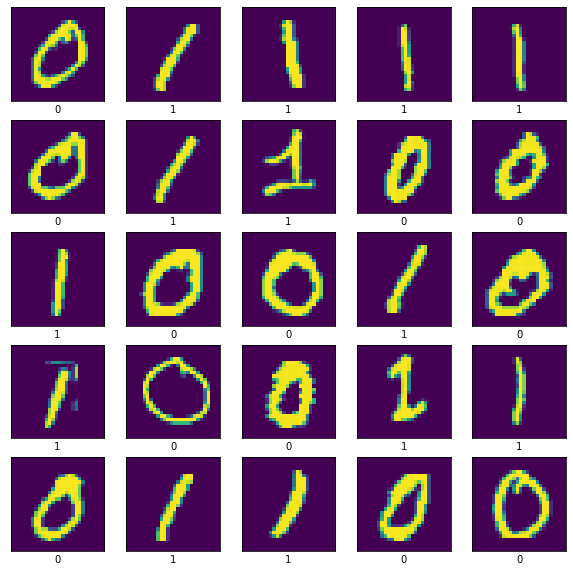

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(trainData[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(trainLabels[i])

plt.show()

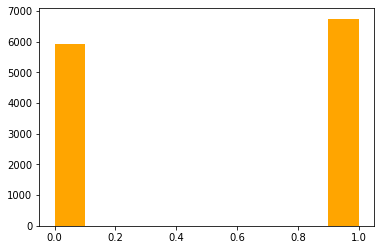

In [12]:
plt.hist(trainLabels,color="orange")
plt.show()

In [13]:
trainData = np.reshape(trainData, (12665, 784))
testData = np.reshape(testData, (2115, 784))

In [14]:
print("Train Data:")
print(np.shape(trainData))
print(np.shape(trainLabels))
print()
print("Test Data:")
print(np.shape(testData))
print(np.shape(testLabels))

Train Data:
(12665, 784)
(12665,)

Test Data:
(2115, 784)
(2115,)


Model training and prediction:

In [15]:
classifier = GaussianNB()
classifier.fit(trainData, trainLabels)
predictedLabels = classifier.predict(testData)

Classification report

In [16]:
from sklearn.metrics import *

print(classification_report(testLabels, predictedLabels))
print(accuracy_score(testLabels, predictedLabels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1135

    accuracy                           0.99      2115
   macro avg       0.99      0.99      0.99      2115
weighted avg       0.99      0.99      0.99      2115

0.9877068557919622


ROC curve and AUC score

In [17]:
fpr, tpr, thresholds = roc_curve(predictedLabels, testLabels)

from sklearn.metrics import confusion_matrix

figCurve = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    color=["blue","red","green"]
)
figCurve.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

figCurve.update_yaxes(scaleanchor="x", scaleratio=1)
figCurve.update_xaxes(constrain='domain')

figCurve.show()

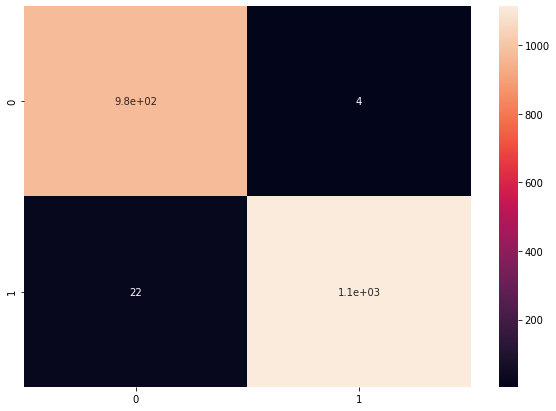

In [18]:
import seaborn as sn
import pandas as pd

array = confusion_matrix(testLabels,predictedLabels)
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

plt.show()

# 3 and 8 classification

Appending only 3 and 8 labels to our data and removing redundant dataset

In [19]:
trainRedundantSet_38=[]
testRedundantSet_38=[]

In [20]:
for index, label in enumerate(tqdm(trainLabelData)):
    if label!=3 and label!=8:
        trainRedundantSet_38.append(index)

for index, label in enumerate(tqdm(testLabelData)):
    if label!=3 and label!=8:
        testRedundantSet_38.append(index)

100%|██████████| 10000/10000 [00:00<00:00, 254422.28it/s]


Deleting the redundant data from the original array

In [21]:
trainData_38 = np.delete(trainImageData, trainRedundantSet_38, axis=0)
trainLabels_38 = np.delete(trainLabelData, trainRedundantSet_38, axis=0)

testData_38 = np.delete(testImageData, testRedundantSet_38, axis=0)
testLabels_38 = np.delete(testLabelData, testRedundantSet_38, axis=0)

Reshaping the data

In [22]:
print("Train Data:")
print(np.shape(trainData_38))
print(np.shape(trainLabels_38))
print()
print("Test Data:")
print(np.shape(testData_38))
print(np.shape(testLabels_38))

Train Data:
(11982, 28, 28)
(11982,)

Test Data:
(1984, 28, 28)
(1984,)


Some Sample Data

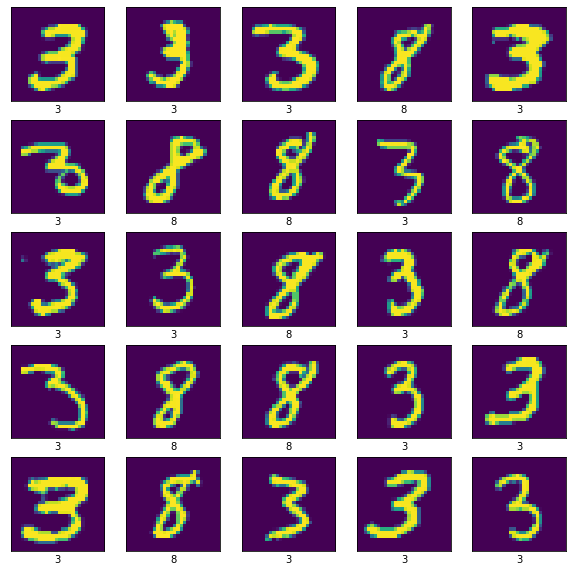

In [23]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(trainData_38[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(trainLabels_38[i])

plt.show()

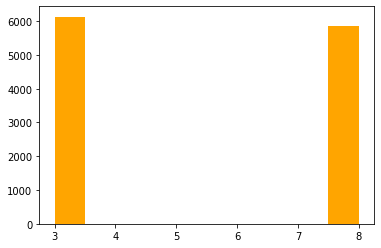

In [24]:
plt.hist(trainLabels_38,color="orange")
plt.show()

In [25]:
trainData_38 = np.reshape(trainData_38, (11982, 784))
testData_38 = np.reshape(testData_38, (1984, 784))

In [26]:
print("Train Data:")
print(np.shape(trainData_38))
print(np.shape(trainLabels_38))
print()
print("Test Data:")
print(np.shape(testData_38))
print(np.shape(testLabels_38))

Train Data:
(11982, 784)
(11982,)

Test Data:
(1984, 784)
(1984,)


Model Training and Prediction

In [27]:
classifier_38 = GaussianNB()
classifier_38.fit(trainData_38, trainLabels_38)
predictedLabels_38 = classifier.predict(testData_38)

Classification Report

In [28]:
from sklearn.metrics import *

print(classification_report(testLabels_38, predictedLabels_38))
print(accuracy_score(testLabels_38, predictedLabels_38))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00    1010.0
           8       0.00      0.00      0.00     974.0

    accuracy                           0.00    1984.0
   macro avg       0.00      0.00      0.00    1984.0
weighted avg       0.00      0.00      0.00    1984.0

0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [29]:
for i in range(0,1984):
    if predictedLabels_38[i] == 3:
        predictedLabels_38[i] = 0
    elif predictedLabels_38[i] == 8:
        predictedLabels_38[i] = 1

for i in range(0,1984):
    if testLabels_38[i] == 3:
        testLabels_38[i] = 0
    elif testLabels_38[i] == 8:
        testLabels_38[i] = 1

In [30]:
fpr_38, tpr_38, thresholds_38 = roc_curve(predictedLabels_38, testLabels_38)

from sklearn.metrics import confusion_matrix

figCurve_38 = px.area(
    x=fpr_38, y=tpr_38,
    title=f'ROC Curve (AUC={auc(fpr_38, tpr_38):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    color=["blue","red","green"]
)
figCurve_38.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1,
)

figCurve_38.update_yaxes(scaleanchor="x", scaleratio=1)
figCurve_38.update_xaxes(constrain='domain')

figCurve_38.show()

In [31]:
import seaborn as sn
import pandas as pd

array_38 = confusion_matrix(testLabels_38,predictedLabels_38)
array_38=array_38
print(array_38)

[[875 135]
 [740 234]]


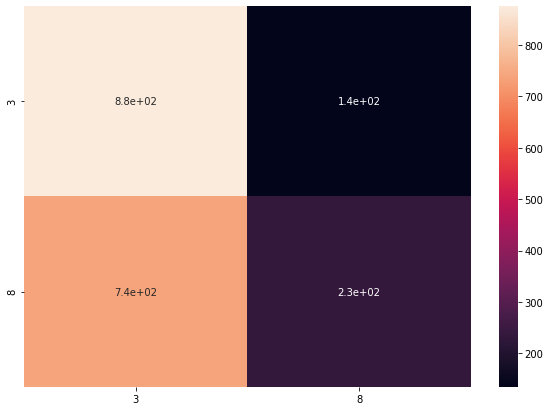

In [32]:
df_cm_38 = pd.DataFrame(array_38, index = [i for i in "38"],
                  columns = [i for i in "38"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm_38, annot=True)
plt.show()

In [33]:
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)
# # Overall accuracy